#Name :- shubham Gajanan Tade 
#batch no : B1027
#porject :- Medical Insurance Cost Prediction 

#importing all requred libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


#Load Dataset

In [3]:
df = pd.read_csv("medical_insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##Performing EDA 
#numerical feature plots

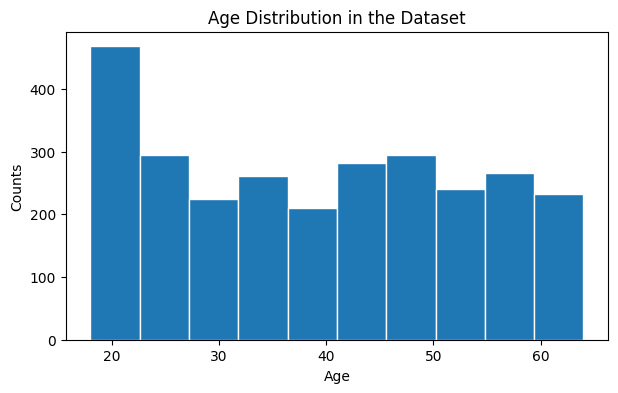

In [11]:
plt.figure(figsize=(7,4))
plt.hist(df['age'] , edgecolor='white' , label='d')
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Distribution in the Dataset")
plt.show()

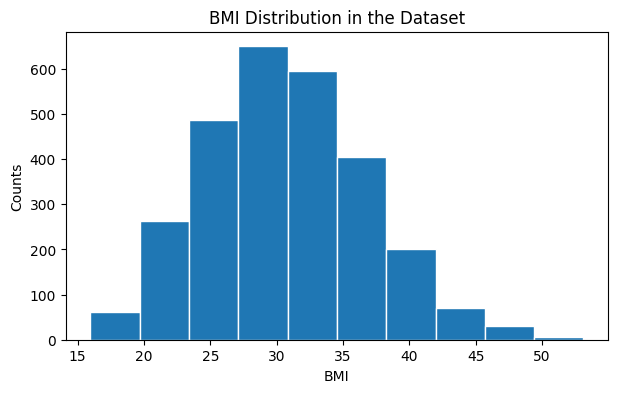

In [12]:
plt.figure(figsize=(7,4))
plt.hist(df['bmi'],edgecolor='white',label='d')
plt.xlabel("BMI")
plt.ylabel("Counts")
plt.title('BMI Distribution in the Dataset')
plt.show()

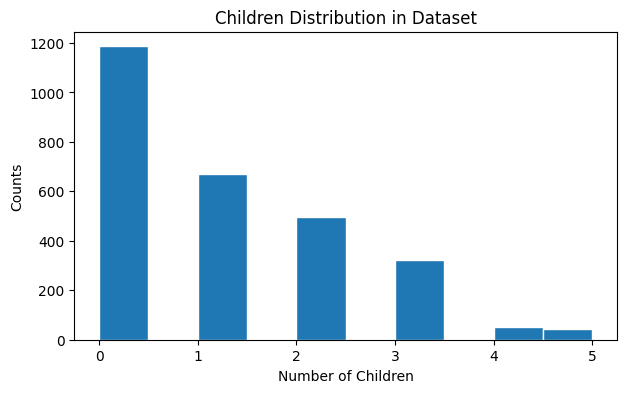

In [13]:
plt.figure(figsize=(7,4))
plt.hist(df['children'] , edgecolor ='white',label='d')
plt.xlabel('Number of Children')
plt.ylabel('Counts')
plt.title("Children Distribution in Dataset")
plt.show()

#Categorical Feature Plots

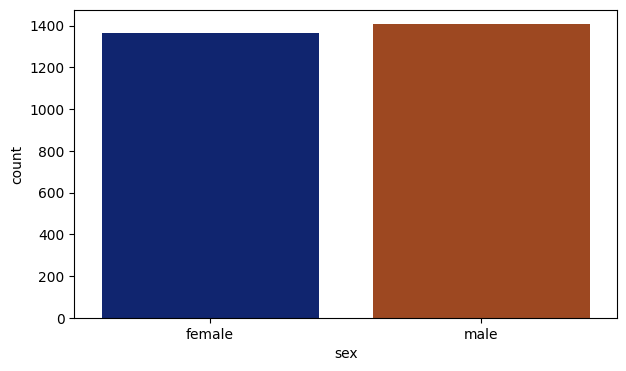

In [14]:
plt.figure(figsize=(7,4))
sns.countplot(x='sex',data=df,palette='dark')
plt.show()

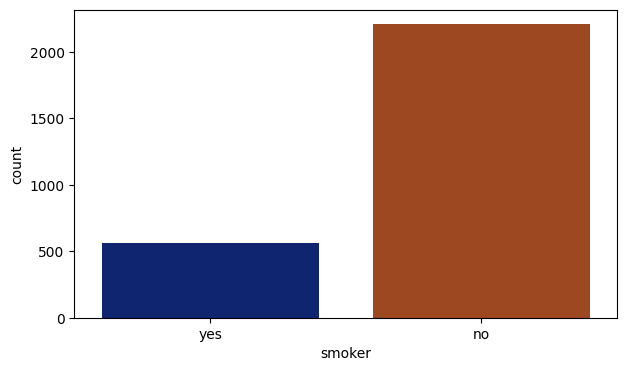

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(x='smoker',data=df,palette='dark')
plt.show()

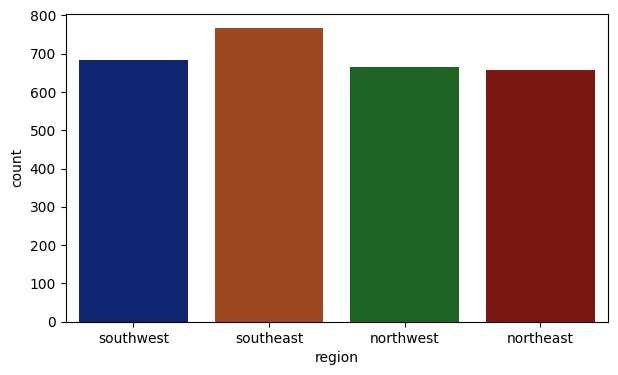

In [16]:
plt.figure(figsize=(7,4))
sns.countplot(x='region',data=df,palette='dark')
plt.show()

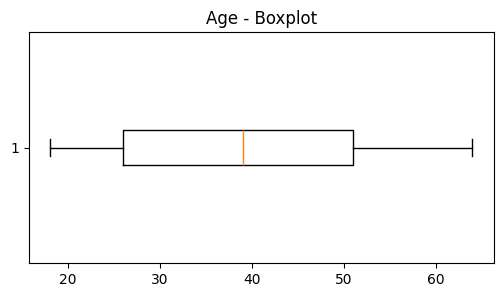

In [17]:
plt.figure(figsize=(6,3))
plt.boxplot(df['age'],vert=False)
plt.title("Age - Boxplot")
plt.show()

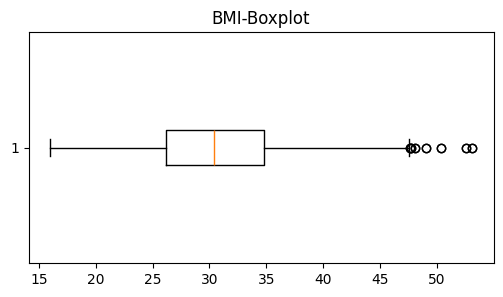

In [18]:
plt.figure(figsize=(6,3))
plt.boxplot(df['bmi'],vert=False)
plt.title('BMI-Boxplot')
plt.show()

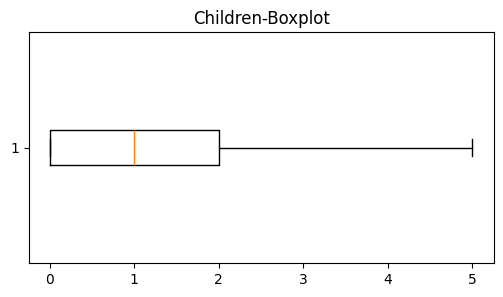

In [19]:
plt.figure(figsize=(6,3))
plt.boxplot(df['children'],vert=False)
plt.title('Children-Boxplot')
plt.show()

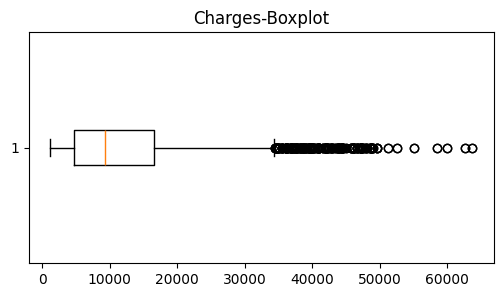

In [20]:
plt.figure(figsize=(6,3))
plt.boxplot(df['charges'],vert=False)
plt.title('Charges-Boxplot')
plt.show()

##the Smoker make this charges outliers , it could be affect our model
#Removing outliers from charges column

In [21]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [22]:
from scipy  import stats
data = df[np.abs(stats.zscore(df['charges']))<3]
data.reset_index(inplace=True,drop=True)

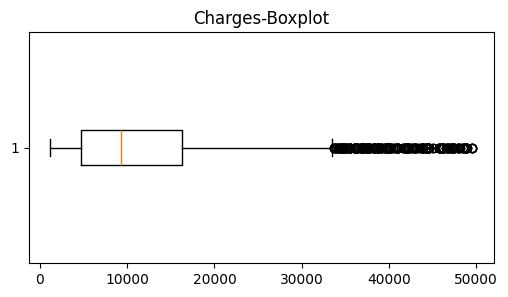

In [23]:
plt.figure(figsize=(6,3))
plt.boxplot(data['charges'],vert=False)
plt.title('Charges-Boxplot')
plt.show()

In [24]:
data['charges'].mean()

13035.810150883974

#Analyzing Data (finding relation)

In [25]:
data_cor =data.copy()
label_encoder = LabelEncoder()
for col in ['sex','smoker','region']:
    data_cor[col] = label_encoder.fit_transform(data_cor[col])

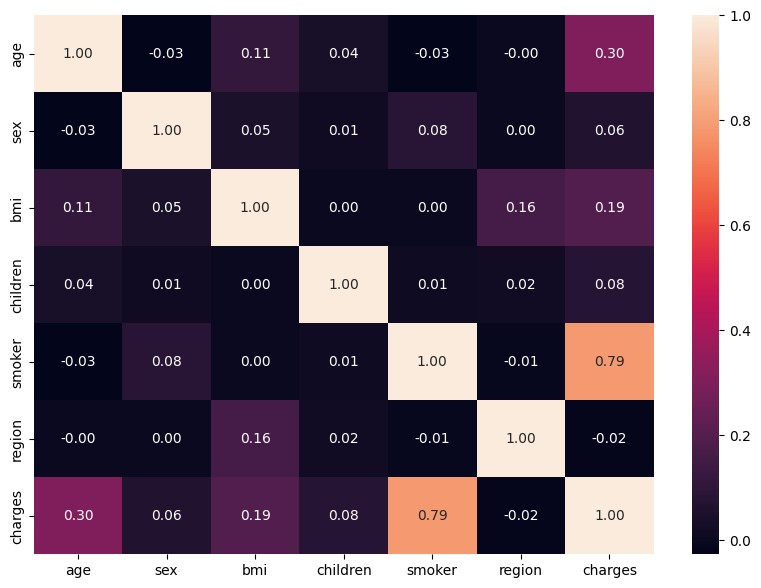

In [26]:
data_cor = data_cor.corr()
plt.figure(figsize=(10,7))
sns.heatmap(data = data_cor,annot=True,fmt='.2f')
plt.show()

In [27]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Splitting the data and get dummies

In [48]:
dum = pd.get_dummies(data[['sex','region','smoker',]],dtype=int)
data_mod = pd.concat([data[['age','bmi','children','charges']],dum],axis=1)
data_mod.head()


,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0


In [29]:
X = data_mod.drop(columns=['charges'])
y = data_mod['charges']

In [30]:
X_train , X_test, y_train, y_test = train_test_split(X,y ,test_size=0.25 , random_state=7)

#Train the data using Linear regression

In [31]:
model = LinearRegression()

In [32]:
model.fit(X_train , y_train)

LinearRegression()

In [33]:
model.score(X_test,y_test)

0.7795213236264347

In [34]:
model.score(X_train,y_train)

0.74249425622043

#train the data using Random Forest Regressor

In [35]:
model_2 = RandomForestRegressor()

In [36]:
model_2.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
model_2.score(X_test,y_test)

0.9542975151522481

In [38]:
model_2.score(X_train,y_train)

0.9909139188423778

##RandomForestRegressor give score very well

##dump the model 

In [39]:

from joblib import dump

model = RandomForestRegressor() el
model.fit(X_train, y_train)  


dump(model, 'trained_random_forest_model_project.joblib')

['trained_random_forest_model_project.joblib']

##load the model and Make Predictions

In [56]:
from joblib import load


model_path = 'trained_random_forest_model_project.joblib'
model = load('trained_random_forest_model_project.joblib')


example_input = pd.DataFrame({
     'age': [18],
    'bmi': [33.77],
    'children': [1],
    'sex_female': [0],
    'sex_male': [1],
    'region_northeast': [0],
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0],
    'smoker_no': [1],
    'smoker_yes': [0],  
})


predicted_charges = model.predict(example_input)
print("Predicted charges:", predicted_charges)

Predicted charges: [1713.743249]


In [55]:
data_mod

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2753,47,45.320,1,8569.86180,1,0,0,0,1,0,1,0
2754,21,34.600,0,2020.17700,1,0,0,0,0,1,1,0
2755,19,26.030,1,16450.89470,0,1,0,1,0,0,0,1
2756,23,18.715,0,21595.38229,0,1,0,1,0,0,1,0


##model make prediction very well